![Image of Yaktocat](https://i0.wp.com/ctbeertours.com/wp-content/uploads/2016/07/kickstarter-website-banner.jpg?fit=955%2C328)

Kickstarter jest to uruchomiona w 2009 roku platforma, poświęcona crowdfundingowi, czyli społecznościowym zbiórkom pieniędzy. Finansowane są tam projekty takie jak filmy, animacje, gry komputerowe, karciane, planszowe, komiksy, albumy muzyczne, a także projekty związane ze sztuką, modą, fotografią, publicystyką, teatrem, tańcem, jedzeniem oraz nowoczesnymi technologiami.Osoby, które chcą wesprzeć projekt wpłacają pieniądze. Jeśli w ustalonym czasie uda się zebrać zadeklarowaną przez pomysłodawców kwotę, pieniądze – po potrąceniu prowizji serwisu – są im wypłacane. Gdy wymagana kwota nie zostanie zebrana, pieniądze wracają do osób, które wsparły projekt.

#### 1. W 2015 urządzenie Pebble Time uzyskało dotację w wysokości 20.338.986 USD
<img src="https://ksr-ugc.imgix.net/assets/012/032/069/46817a8c099133d5bf8b64aad282a696_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463725702&auto=format&frame=1&q=92&s=43b2da867d3cc18964d8279d13e9f575\" width="500" align="center">

#### 2. W 2014 wynalazek Coolest Cooler, czyli multichłodziarka zebrał 13.285.226 USD oraz doczekał się wpisu na Wikipedii.
<img src="https://ksr-ugc.imgix.net/assets/011/595/682/65a3f1f355d79198457b6d66526c0e88_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463684988&auto=format&frame=1&q=92&s=5cb24bb172d07c304bc2e1e480708f9e" width="500" align="center">

#### 3. W 2 lata później, w 2016, kolejna wersja Pebble 2, Time 2 zyskała popularność oraz 12.779.843 USD dotacji.
<img src="https://ksr-ugc.imgix.net/assets/011/244/931/2430b84825e9c8e64d6b17faa20d2cb9_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1464876220&auto=format&frame=1&q=92&s=b0d0b243cdbb45eb61ef90cec2c77d35" width="500" align="center">

#### 4. Kingdom Death: Monster 1.5 - 12.393.139 USD

<img src="https://cdn-images-1.medium.com/max/2600/1*bimzWvqK0SQU_ROpLIPnjA.jpeg" width="500" align="center">

#### 5. Pebble E-Paper Watch for iPhone and Android - 10.266.845 USD
<img src="https://ksr-ugc.imgix.net/assets/011/334/500/5525884a63076aaa23356031e0b305c4_original.png?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463681170&auto=format&frame=1&q=92&s=329794cf5724313dedb592a595239f98" width="500" align="center">

Na platformie Kickstarter tylko niektórym projektom udaje się uzyskać tak wysokie dofinansowanie, aby ostatecznie doszło do produkcji oraz wypuszczenia produktu na rynek. Większości projektów niestety nie udaje się uzyskać założonej kwoty progowej. Korzystając z danych wyjściowych umieszczonych w serwisie Kaggle (https://www.kaggle.com/kemical/kickstarter-projects), postawiliśmy sobie za cel przewidzenie, które projekty zakonczą się sukcesem. 

Modelowanie ma na celu predykcję projektów, które otrzymają założoną przez twórców wynalazku kwotę dofinansowania.

In [1]:
import pandas as pd
import numpy as np
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import BallTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML
import time
import warnings; warnings.simplefilter('ignore')


In [2]:
pd.set_option('display.max_columns', 12)
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
print(df.shape)

(378661, 15)


# Omówienie datasetu

Dane wejściowe zawierają 15 cech (features), z których wyodrębniliśmy kluczowe dla uzyskania predykcji.
Kategorie uwzględnione w modelowaniu to 6 cech: 'main_category', 'launched','deadline', 'state', 'backers', 'usd_goal_real'.

Cechy te okreslają kolejno: 
1. main category - jedna z 15 kategorii, do której może być zaklasyfikowany projekt
2. launched - czas rozpoczęcia projektu, w analizie uwzględniamy dane do stycznia 2018 roku
3. deadline -  zaplanowana data zakończenia zbiórki czas zbiórki 
4. state - jeden z 6 statusów, dla modeli jest to predykowana cecha sukcesu (czy zbiórka się powiodła)
5. backers - liczba wspierających
6. usd_goal_real - kwota celu zbiórki wyrażona w dolarach. Z uwagi na zastosowanie aż 14 różnych walut w odniesienia do cechy "goal", w modelu uwzględniono cechę 'usd_goal_real' czyli wartość dającą się porównywać między walutami wyrażoną w dolarach amerykańskich. 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [5]:
print(df.nunique())

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


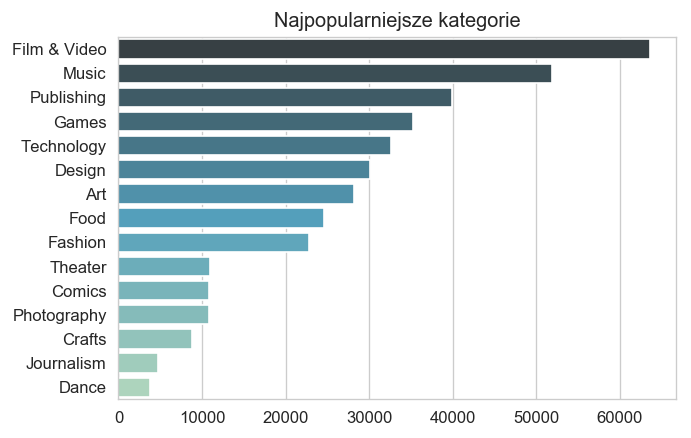

In [6]:
sns.set_style('whitegrid')
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="GnBu_d")

plt.title('Najpopularniejsze kategorie')
plt.show()

Spośród 15 kategorii głównych, zdecydowanie największą popularnością wśród kickstarterowych projektów cieszy się branża kreatywno-technologiczna. Film&Video, Muzyka czy Design dominują, choć równie ważne miejsce zajmują biznesy związane z grami komputerowymi oraz nowinkami technologicznymi. 
Tradycyjne mniej techniczne działy kreatywne takie jak publikacje, sztuka, moda, teatr, fotografia czy komiks, a nawet rękodzieło znajdują się dużo dalej w rankingu.

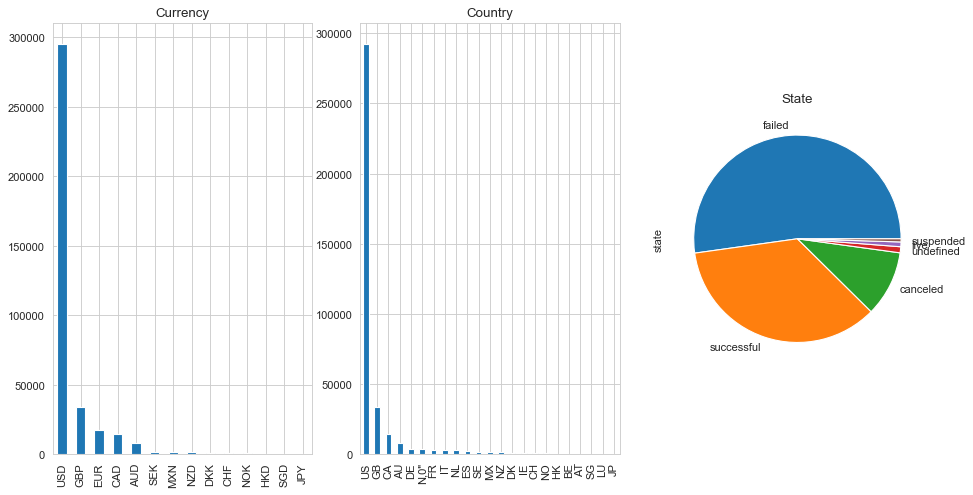

In [7]:
sns.set_style('whitegrid')

fig = plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(131, title='Currency')
df['currency'].value_counts().plot.bar()

currenty = df['currency'].value_counts().plot.bar()
plt.subplot(132, title='Country')
df['country'].value_counts().plot.bar()

plt.subplot(133, title='State')
df['state'].value_counts().plot.pie()
plt.tight_layout(pad=0.0005, w_pad=0.0001, h_pad=2.0)
plt.show()

Powyższe wykresy wskazują również na brak zasadności zastosowania podziałów zgodnych z walutą oraz krajem. 

Uzasadnienie:
WALUTA ...
KRAJ   ...

Na wykresie kołowym widać podział projektów ze względu na osiągnięty sukces.

In [1]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '12pt'})

NameError: name 'df' is not defined

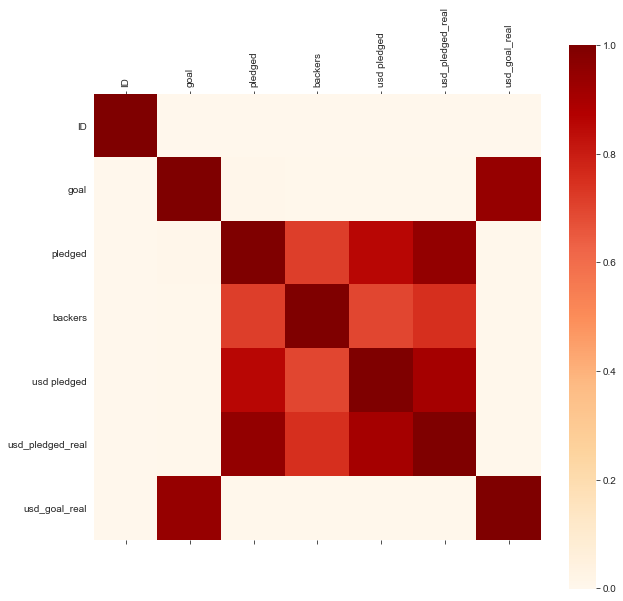

In [9]:
import seaborn as sns


def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(corr)
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="OrRd")
    
  
plot_corr(df)

## Preprocessing - przygotowanie danych.

Tutaj nalezy zrobic Omówienie preprocessingu - data cleaning, normalizacje, transformacje, feature engineering  itp.


In [10]:
wo_cl = df['name']
categorical_columns = ['main_category']
df = pd.get_dummies(df, columns=categorical_columns)
df = df[df['state'].isin(['failed', 'successful'])]
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)
df = df.drop(columns=['ID', 'name', 'pledged', 'goal', 'usd pledged', 'usd_pledged_real', 'category', 'currency', 'country'], 
             axis=1)
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')
df = df.drop(columns=['launched', 'deadline'])

In [11]:
print(df.shape)

(331675, 19)


## Usuwanie wartości odstających.

In [12]:
q1 = df['usd_goal_real'].quantile(0.25)
q3 = df['usd_goal_real'].quantile(0.75)
iqr = q3 - q1
down = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr
df['usd_goal_real'] = df['usd_goal_real'][(df['usd_goal_real'] > down) & (df['usd_goal_real'] < up)]
df = df.dropna(axis=0, how='any')

In [13]:
X = df.drop(columns=['state'], axis=1)
y = df['state']

In [14]:
print(df.shape)

(292604, 19)


In [15]:
sc = preprocessing.StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)

## Podział na zbiór uczący i testowy.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=101, stratify=y)

In [17]:
print(X_train.shape)
print(X_test.shape)

(242861, 18)
(49743, 18)


In [18]:
acc_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)
kfold = KFold(n_splits=5, random_state=11)

## Logistic Regresion

In [19]:

t0=time.time()
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1, max_iter=100).fit(X_train, y_train)
coef_print = pd.DataFrame(logreg.coef_)
res_logreg_acc = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_logreg_f1 = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_logreg = res_logreg_acc.mean()
f1_logreg = res_logreg_f1.mean()
print('Logistic regresion accuracy:\t', acc_logreg)
print('Logistic regresion F1 score:\t', f1_logreg)
#print(coef_print)
print('Time taken :' , time.time()-t0)


Logistic regresion accuracy:	 0.9091579119779063
Logistic regresion F1 score:	 0.8911796902584402
Time taken : 22.178696870803833


## KNN z cross walidacją


In [30]:
t0=time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
res_knn_acc = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=acc_scorer)
res_knn_f1 = cross_val_score(knn, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_knn = res_knn_acc.mean()
f1_knn = res_knn_f1.mean()
print('KNN accuracy:\t',acc_knn)
print('F1 score:\t',f1_knn)
print('Time taken :' , time.time()-t0)

KeyboardInterrupt: 

In [21]:
#Wybor classifiera dla KNN

In [29]:
k_range = range(100,200)
k_scores = []
for k in k_range:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

MSE = [1-x for x in k_scores]
optimal_k = k_range[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

5
[0.8997903726743657]
The optimal number of neighbors is 100


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

t0=time.time()
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=10,random_state=101, min_samples_leaf=2, criterion="gini")
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=acc_scorer)
f1_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=f1_scorer)
print('Random Forest accuracy:\t', acc_cv_rf.mean())
print('Random Forest F1 score:\t', f1_cv_rf.mean())
print('Time taken :' , time.time()-t0)

for n in range (1,10):
    clf_rf = RandomForestClassifier(n_estimators=n, max_depth=10,random_state=101, min_samples_leaf=2, criterion="gini")
    clf_rf.fit(X_train,y_train)
    y_pred_rf = clf_rf.predict(X_test)
    acc_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=acc_scorer)
    f1_cv_rf = cross_val_score(clf_rf, X_train, y_train, cv=kfold, scoring=f1_scorer)
    print('Random Forest accuracy:\t', acc_cv_rf.mean())
    print('Random Forest F1 score:\t', f1_cv_rf.mean())
    #print('Time taken :' , time.time()-t0)




Random Forest accuracy:	 0.9209465519728658
Random Forest F1 score:	 0.9109165999450282
Time taken : 13.858871698379517
Random Forest accuracy:	 0.8980281130234458
Random Forest F1 score:	 0.8850269557959095
Random Forest accuracy:	 0.9146095918619264
Random Forest F1 score:	 0.9034749334360915
Random Forest accuracy:	 0.914733121770162
Random Forest F1 score:	 0.9036971557640456
Random Forest accuracy:	 0.919138935928933
Random Forest F1 score:	 0.9087329249504503
Random Forest accuracy:	 0.9206006770799349
Random Forest F1 score:	 0.9104001407056936
Random Forest accuracy:	 0.9207859654572802
Random Forest F1 score:	 0.9104585178858302
Random Forest accuracy:	 0.9213294886441992
Random Forest F1 score:	 0.9112500642735479
Random Forest accuracy:	 0.921070079592275
Random Forest F1 score:	 0.9110009345499182
Random Forest accuracy:	 0.9215312502982362
Random Forest F1 score:	 0.9114937307334469


## Bayes

In [24]:
t0=time.time()
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.fit(X_train,y_train)
y_pred_gnb = clf_gnb.predict(X_test)
acc_cv_gnb = cross_val_score(clf_gnb, X_train, y_train, cv=kfold, scoring=acc_scorer)
f1_cv_gnb = cross_val_score(clf_gnb, X_train, y_train, cv=kfold, scoring=f1_scorer)
print('Bayes accuracy:\t', acc_cv_gnb.mean())
print('Bayes F1 score:\t', f1_cv_gnb.mean())

Bayes accuracy:	 0.737100628601745
Bayes F1 score:	 0.6146721131597268


In [25]:
## SVM

In [26]:
t0=time.time()
clf_svm = LinearSVC(max_iter = 100000, C=10000, dual=False)
clf_svm.fit(X_train, y_train)
cv_svm_acc = cross_val_score(clf_svm, X_train, y_train, cv=kfold, scoring=acc_scorer)
cv_svm_f1 = cross_val_score(clf_svm, X_train, y_train, cv=kfold, scoring=f1_scorer)
acc_svm = cv_svm_acc.mean()
f1_svm = cv_svm_f1.mean()
print('SVM accuracy:\t', acc_svm)
print('SVM F1 score:\t', f1_svm)
print('Time taken :' , time.time()-t0)

SVM accuracy:	 0.9004245165929646
SVM F1 score:	 0.878750811019053
Time taken : 15.936405658721924


## XGBOOST

In [27]:
def run_xgboost_analysis():

    a = [2, 3, 4, 5, 6, 7, 8, 9, 12, 15]
    b = [0.09, 1.0, 1.1]
    c = [50, 100, 150, 200, 250, 300, 320, 350, 400]
    max_scr = 0
    max_dep = 0
    max_len = 0
    max_n_est = 0
    for i in a:
        for j in b:
            for k in c:
                clf_xgbr = XGBClassifier(max_depth=i, learning_rate=j, n_estimators=k)
                #
                results = cross_val_score(clf_xgbr, X_train, y_train, cv=kfold, scoring=scorer)
                #
                res_med = np.median(results)
                if res_med > max_scr:
                    max_dep = i
                    max_len = j
                    max_n_est = k
                    max_scr = res_med
    return max_scr, max_dep, max_len, max_n_est
#max_scr_1, max_dep_1, max_len_1, max_n_est_1 = run_xgboost_analysis()
#print('Best score is {0}, for parameters depth {1}, learning rate {2}, 
print('Xgboost accuracy (max_depth=6, learning_rate=1.0, n_estimators=150): ', 0.923)

Xgboost accuracy (max_depth=6, learning_rate=1.0, n_estimators=150):  0.923


## WYNIKI 

In [35]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 
              'Random Forest', 'Bayes',  
              'Linear SVC', 'XGBoost'],
    'Score': [acc_logreg, acc_knn, acc_cv_rf, acc_cv_gnb, acc_svm, acc_logreg]})

print(acc_logreg, acc_knn, acc_cv_rf, acc_cv_gnb, acc_svm, acc_logreg)
models.sort_values(by='Score', ascending=False)

0.9091579119779063 0.8979251441510044 [0.92055257 0.92396854 0.92022153 0.92201268 0.92090093] [0.74133778 0.73435313 0.73614428 0.73882072 0.73484724] 0.9004245165929646 0.9091579119779063


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## WORLD CLOUD

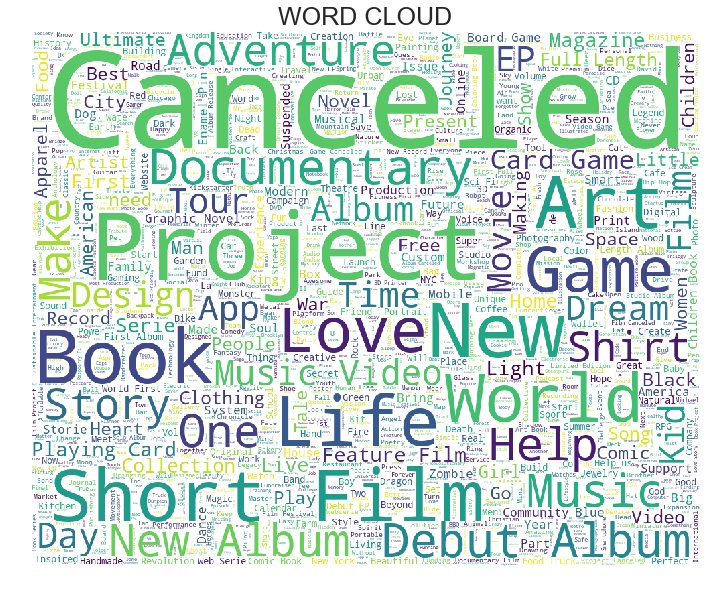

In [28]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(wo_cl.dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD",fontsize=25)
plt.axis('off')
plt.show()